## Business Case :- Fraud Detection in Financial Transactions

### Problem Statemente:-
Identify fraudulent transactions using machine learning models, reducing financial losses for institutions.

***Guidelines :-***
- Preprocess and balance the dataset to address class imbalance.
- Implement anomaly detection models like Isolation Forest, Autoencoders, or SVM.
- Evaluate the model using metrics like precision, recall, and AUC-ROC.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [7]:
pd.set_option('display.max_columns',None)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Axes: ylabel='count'>

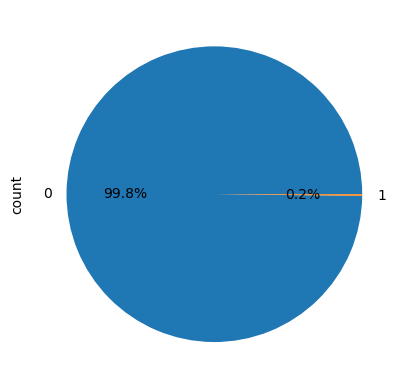

In [9]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data.duplicated().sum()

1081

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [16]:
data.sort_values('Amount',ascending=False).head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,-8.423404,1.186360,1.879982,3.496723,4.082503,1.406178,0.773133,0.902964,5.041069,-7.213527,39.420904,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,-0.083514,-2.281866,3.739366,5.989210,2.582162,3.032874,0.530779,4.712398,-6.938297,38.117209,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,-5.533256,1.446695,0.902675,1.746979,2.354131,0.801598,2.068475,1.413407,0.748320,-3.637371,26.237391,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,-5.545590,1.067549,0.832726,1.592166,2.788521,2.569520,2.721505,-0.613875,3.490798,-3.838863,24.133894,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,-5.341249,0.713033,1.361297,1.410760,2.969936,1.441114,1.134212,0.297532,1.340820,-4.392421,23.649095,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,0.214173,-4.499851,0.241005,0.537895,2.901938,2.326099,-0.402142,1.257379,2.008145,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0
227921,145283.0,-21.532478,-34.704768,-8.303035,10.264175,3.957175,-3.229695,-4.066768,-4.083971,0.554072,-2.166867,0.939705,3.108922,0.808613,4.109779,3.017039,0.554018,1.174609,0.601035,-4.353679,19.746453,5.198718,-7.331078,-32.828995,0.118986,-8.696627,-1.778061,-0.519786,2.716716,10000.00,0
74699,55709.0,-16.950064,-16.417395,-12.523381,6.555638,-27.752964,18.072031,28.504065,-10.152220,2.124673,-2.856014,0.121804,-1.619834,2.231107,-3.041540,2.630401,5.000096,-1.745472,-1.129167,2.639624,-19.902611,-5.932594,0.050097,-10.855949,1.550407,-0.502172,0.821714,12.152401,-4.009839,8790.26,0
245474,152763.0,-14.641710,-28.554825,-12.714462,5.878264,-7.855074,2.471004,11.922577,-2.651203,-2.223985,-2.973570,0.340516,-0.204348,0.966013,2.677857,0.071213,1.634390,0.341256,0.799556,-1.522014,17.819507,5.788207,-3.269671,-8.024556,0.423021,-2.396701,-0.633380,-1.763704,1.422017,8787.00,0


In [17]:
## EDA

In [18]:
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

In [19]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
non_fraud.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

## Explotory Data Analysis

<Axes: ylabel='count'>

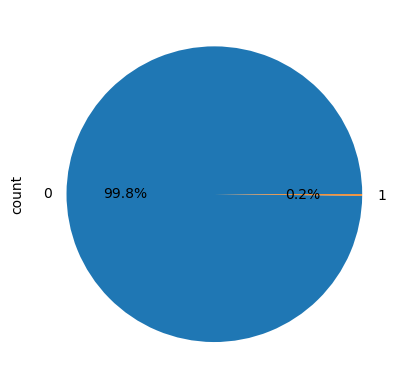

In [63]:
data.Class.value_counts().plot(kind='pie',autopct='%1.1f%%')

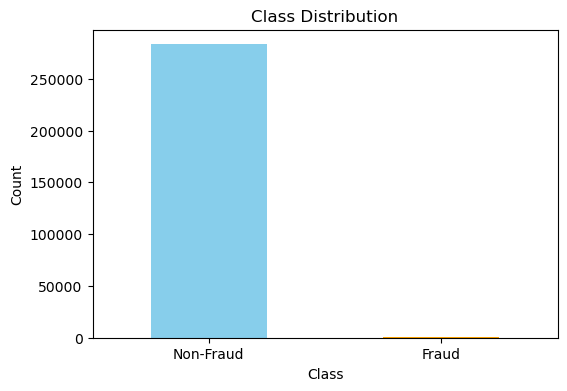

In [21]:
class_counts = data['Class'].value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

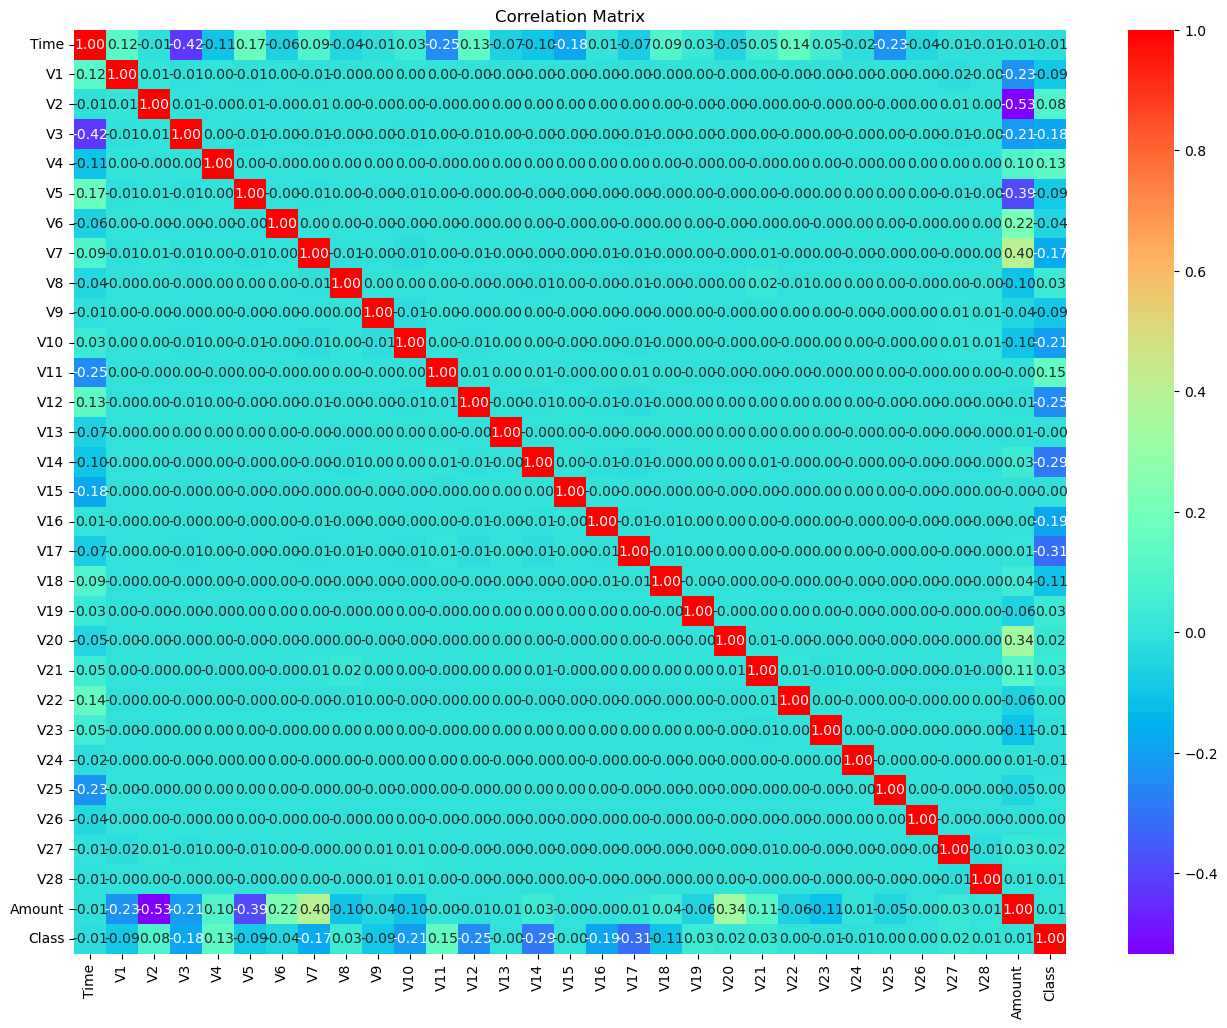

In [22]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), cmap='rainbow', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

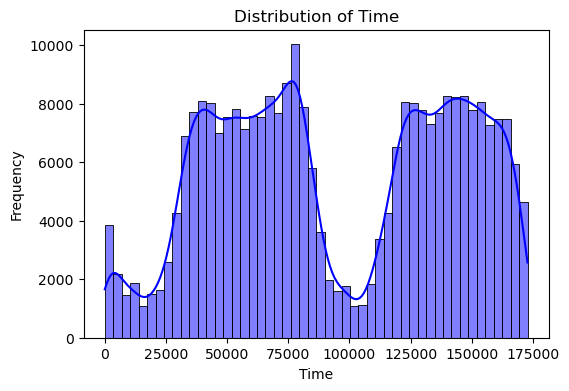

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

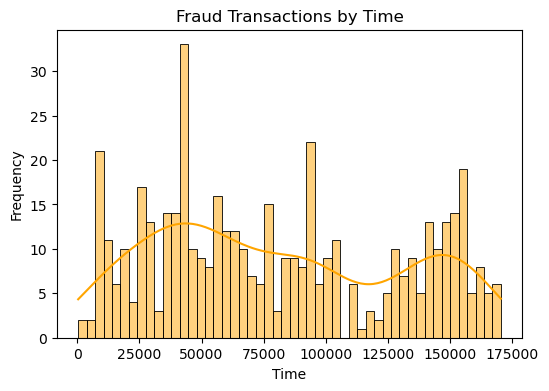

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(fraud['Time'], bins=50, kde=True, color='orange')
plt.title('Fraud Transactions by Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

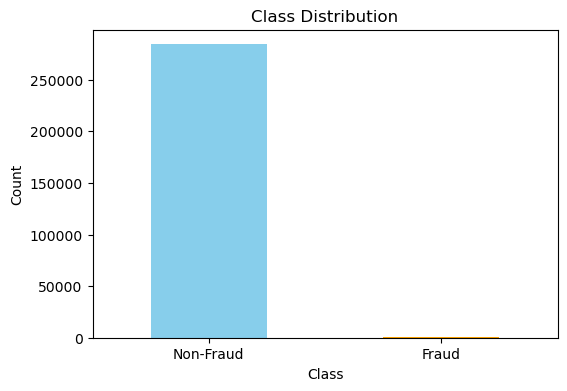

In [54]:
class_counts = y.value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

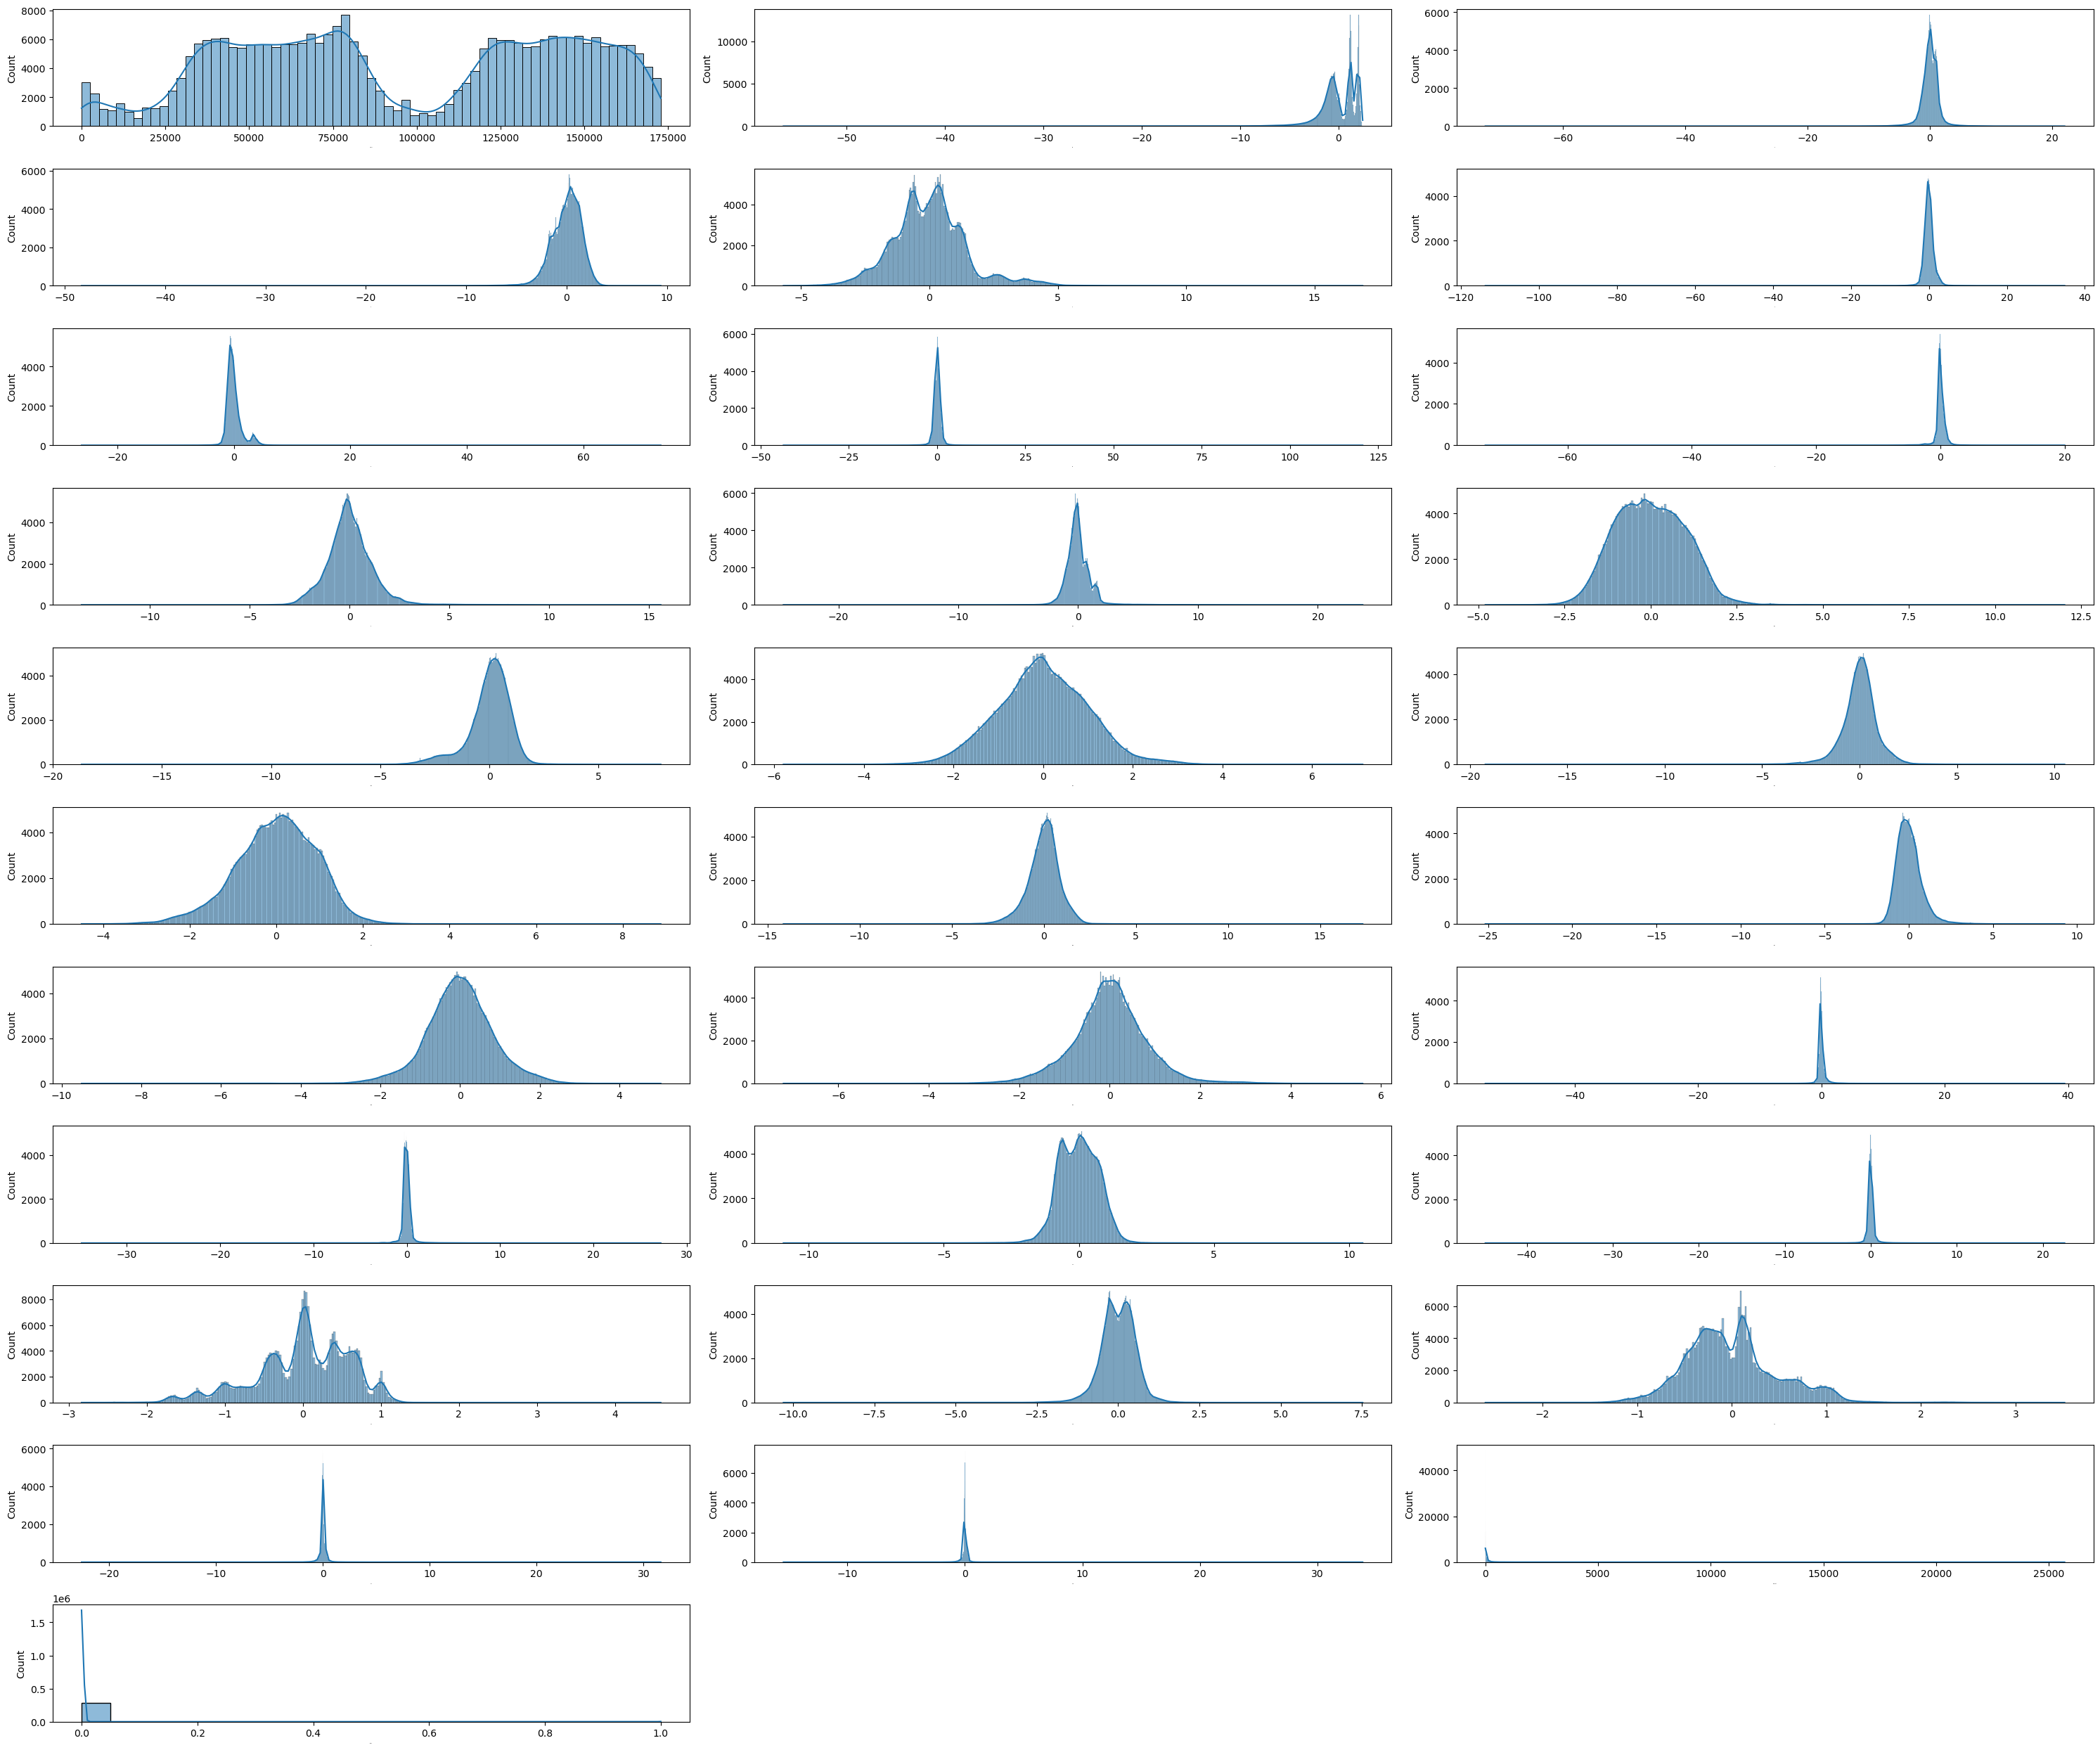

In [9]:
plt.figure(figsize=(30,25))
plotnumber=1
for i in data:
    if plotnumber<32:
        plt.subplot(11,3,plotnumber)
        sns.histplot(data[i],kde=True)
        plt.xlabel(i,fontsize=1)
    plotnumber+=1
plt.tight_layout()

In [68]:
## Check Outliers

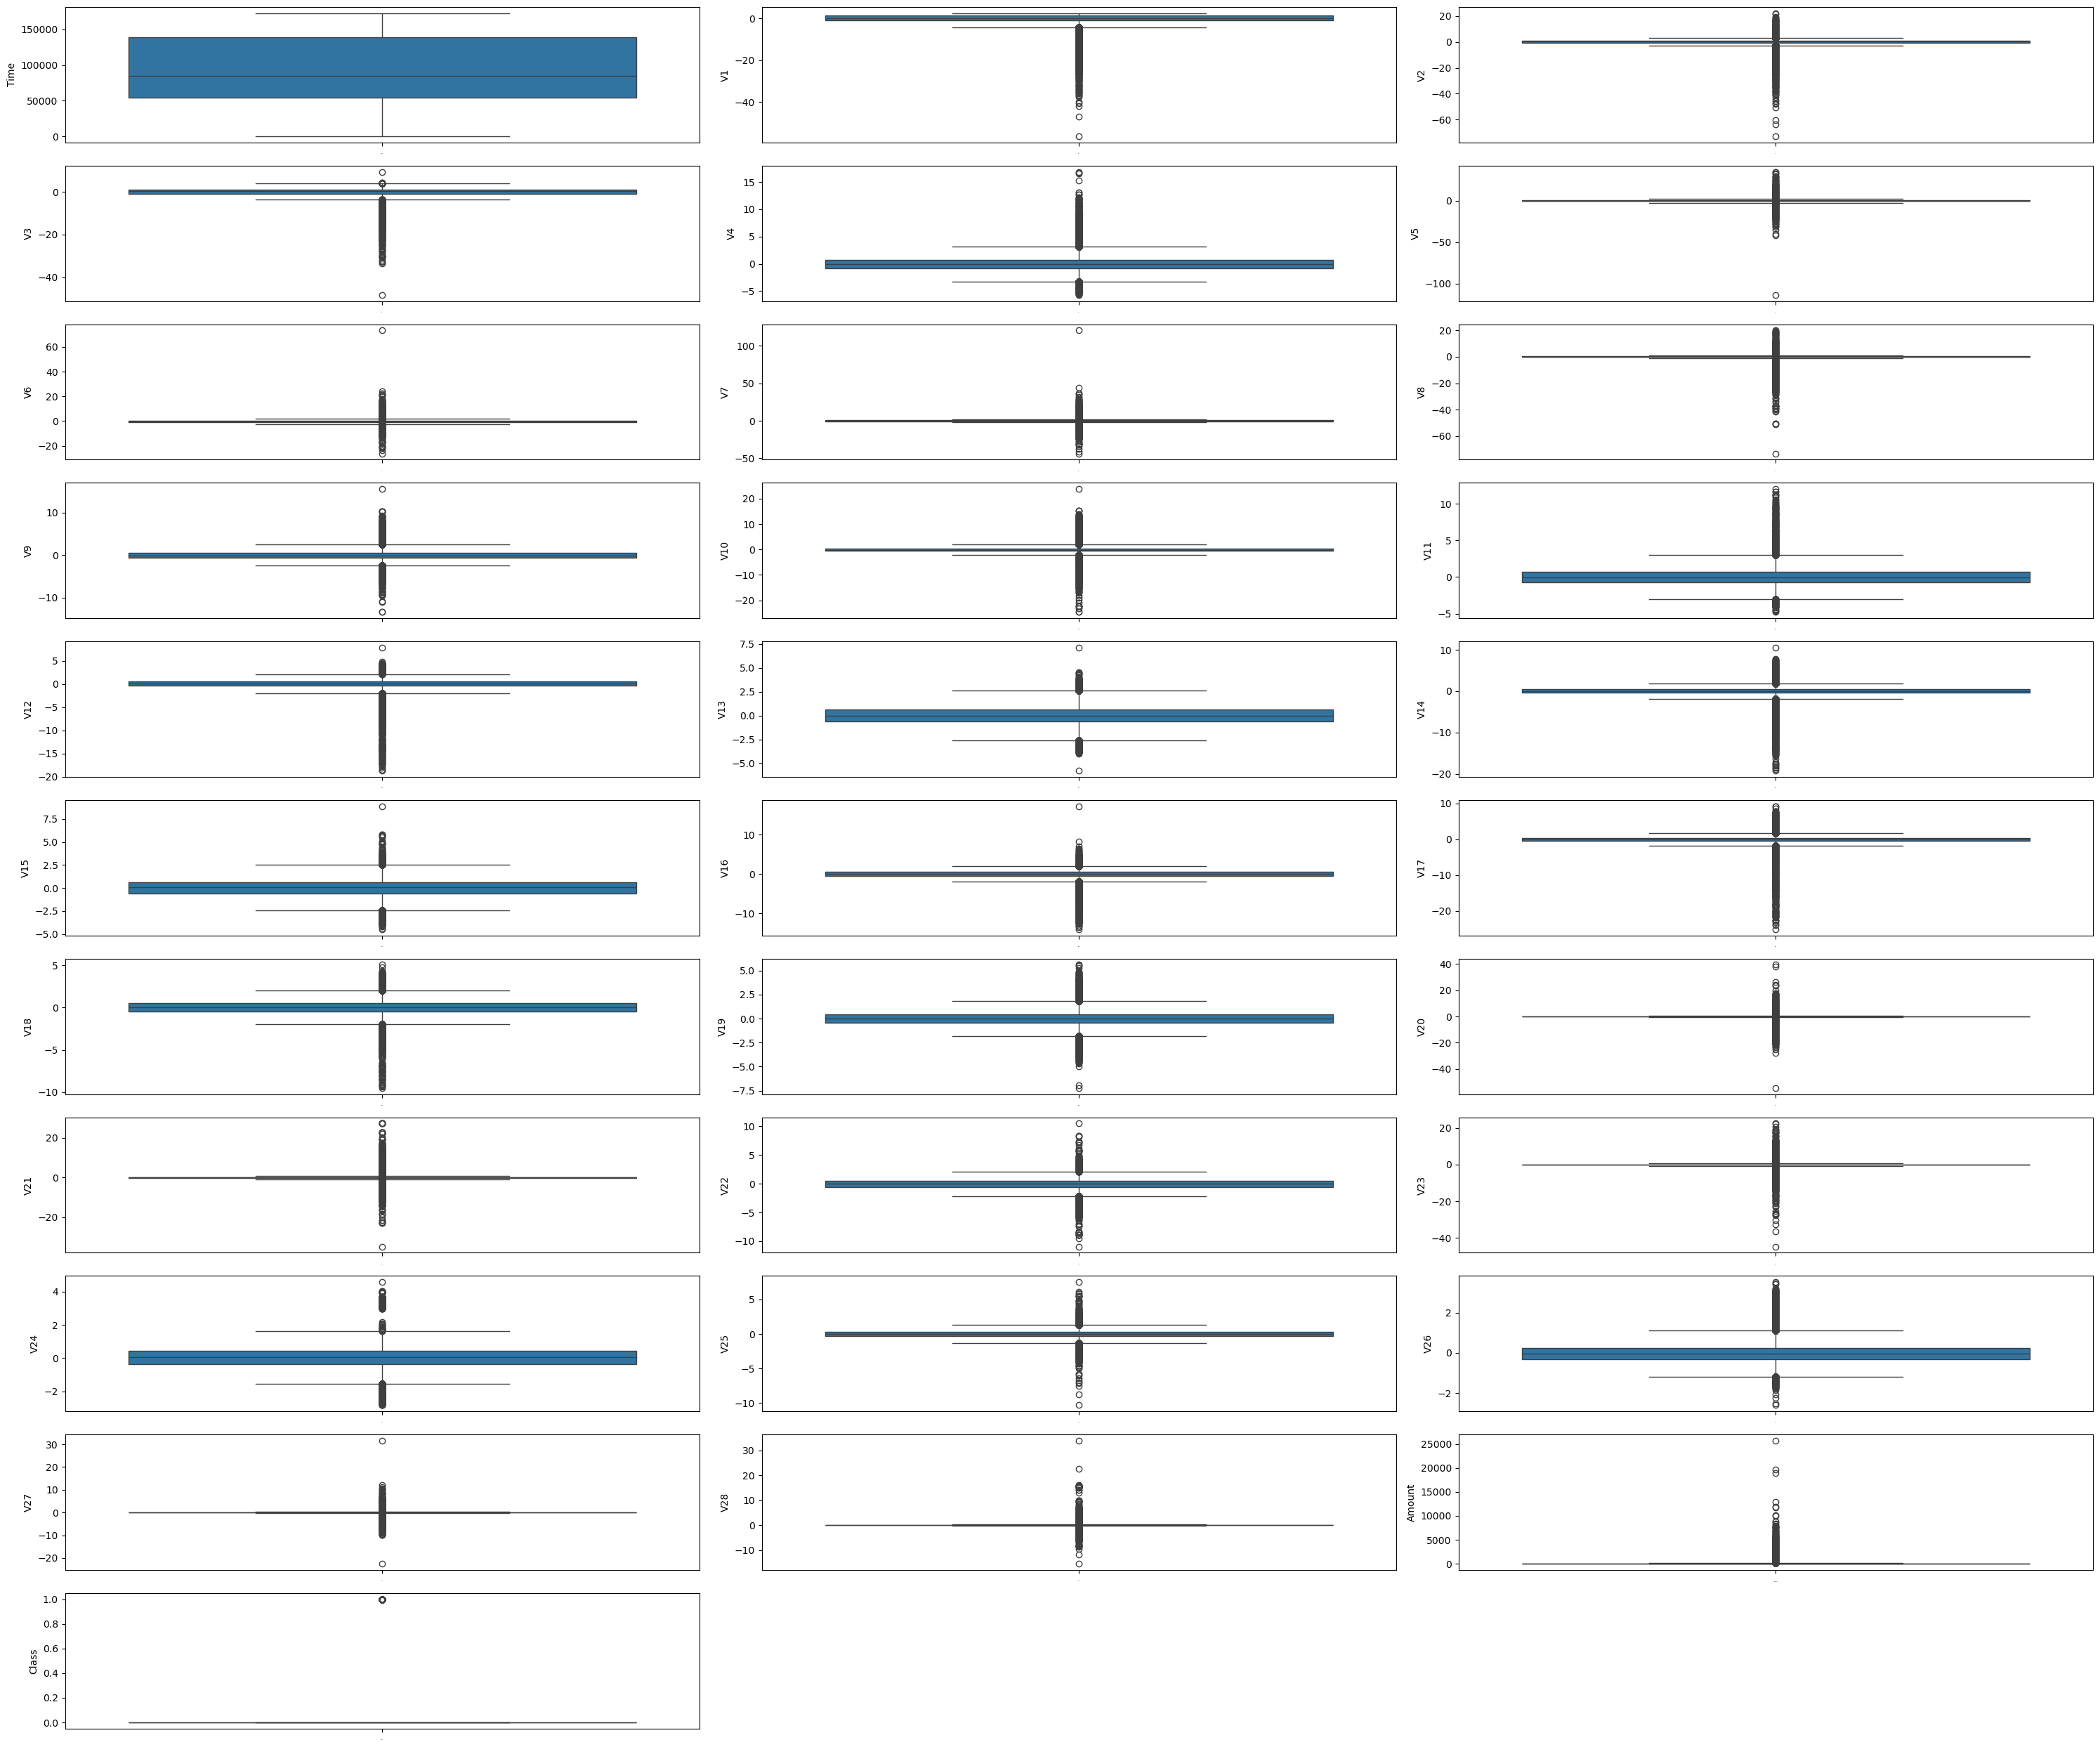

In [10]:
plt.figure(figsize=(30,25))
plotnumber=1
for i in data:
    if plotnumber<32:
        plt.subplot(11,3,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=1)
    plotnumber+=1
plt.tight_layout()

In [26]:
# Iterate over each column in the DataFrame
for column in data.columns:
    print(f"Column: {column}, Skewness: {data[column].skew()}")
    print('----------------------------------------------------------------')


Column: Time, Skewness: -0.03558064623598194
----------------------------------------------------------------
Column: V1, Skewness: -3.273271248440309
----------------------------------------------------------------
Column: V2, Skewness: -4.6951619005404694
----------------------------------------------------------------
Column: V3, Skewness: -2.1519839570997124
----------------------------------------------------------------
Column: V4, Skewness: 0.6715041706728241
----------------------------------------------------------------
Column: V5, Skewness: -2.414079246966253
----------------------------------------------------------------
Column: V6, Skewness: 1.829880383771521
----------------------------------------------------------------
Column: V7, Skewness: 2.890271192715498
----------------------------------------------------------------
Column: V8, Skewness: -8.310970330052545
----------------------------------------------------------------
Column: V9, Skewness: 0.5376630534496958
-

In [27]:
# Skew range
skew_min = -1  # Lower bound
skew_max = 1   # Upper bound

# List to store skewed columns
columns = []

# Iterate over each column in the DataFrame, excluding 'target'
for i in data.drop('Class', axis=1):
    skewness = data[i].skew()  # Calculate skewness for each column
    if skew_min < abs(skewness) < skew_max:  # Check if the absolute skewness is between 0.5 and 5
        columns.append(i)  # Add skewed column to the list

# Check if there are any skewed columns and print results
if columns:
    print(f"Skewed Columns (-1 < skewness < 1): {columns}")
else:
    print('No skewed columns found (all columns have skewness within the skew_range).')


Skewed Columns (-1 < skewness < 1): ['Time', 'V4', 'V9', 'V11', 'V13', 'V15', 'V18', 'V19', 'V22', 'V24', 'V25', 'V26', 'V27']


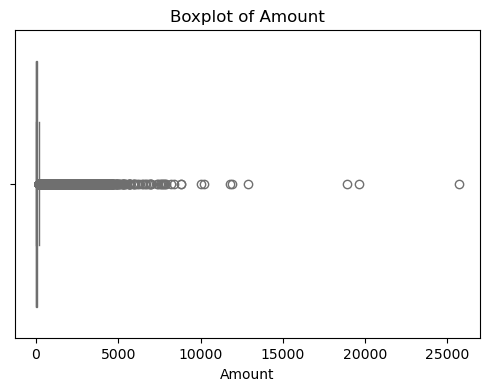

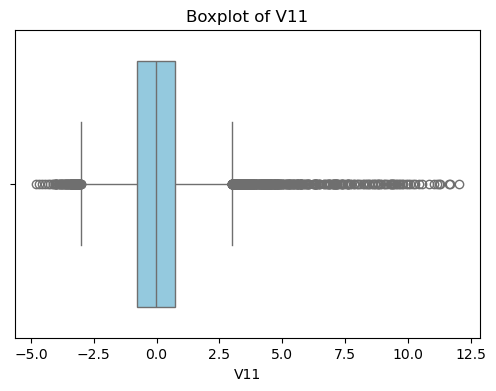

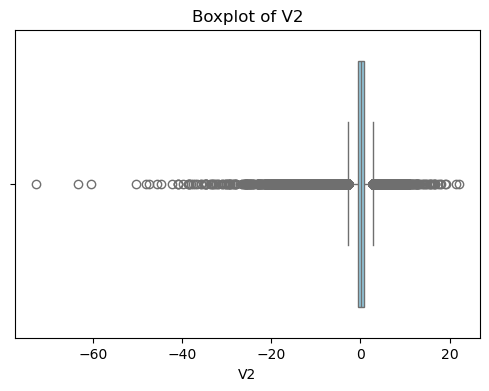

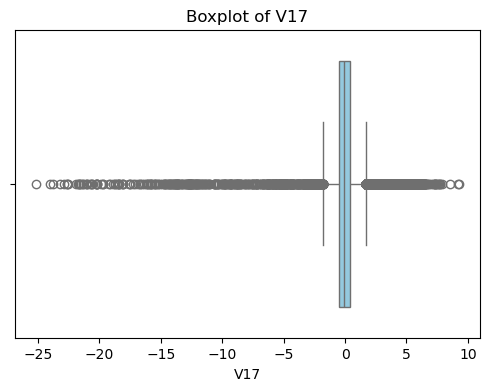

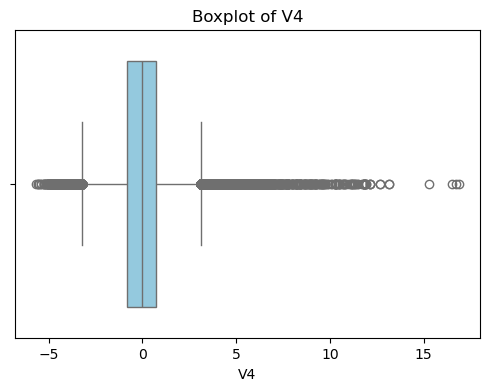

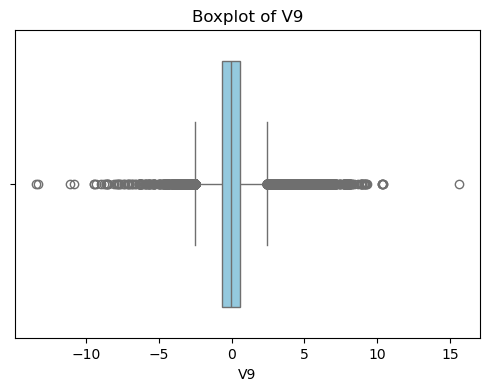

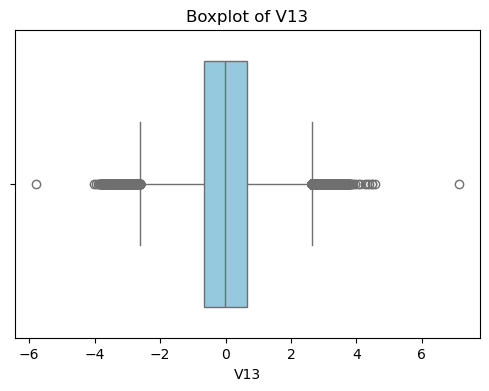

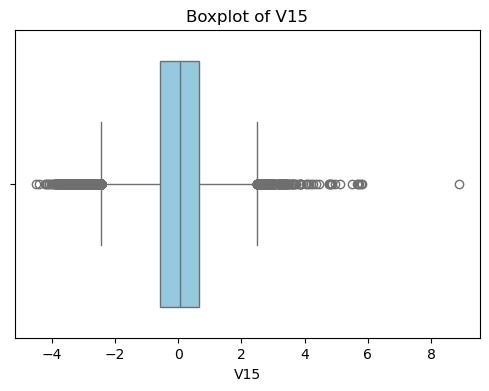

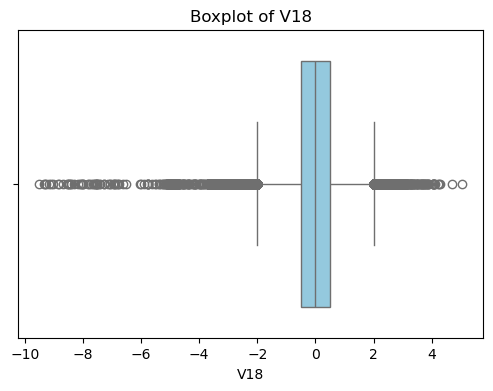

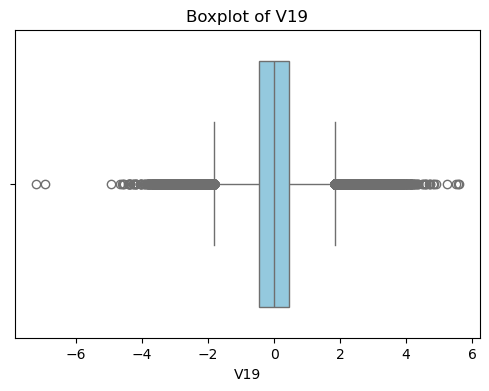

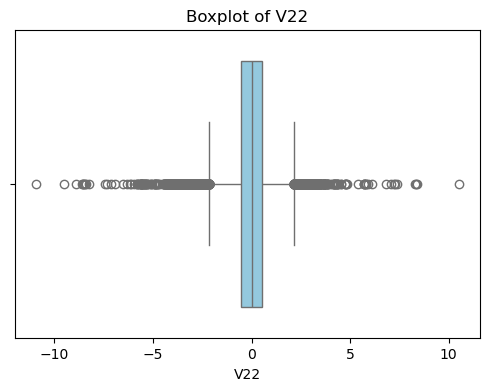

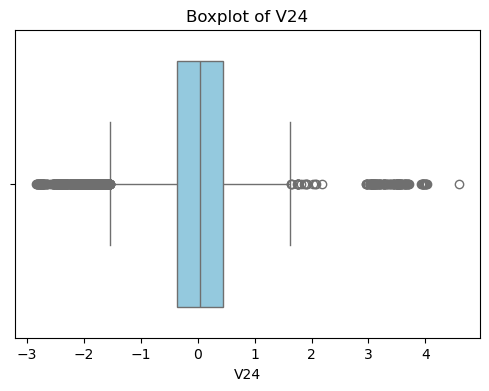

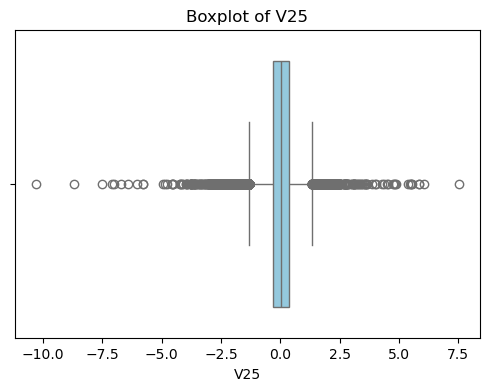

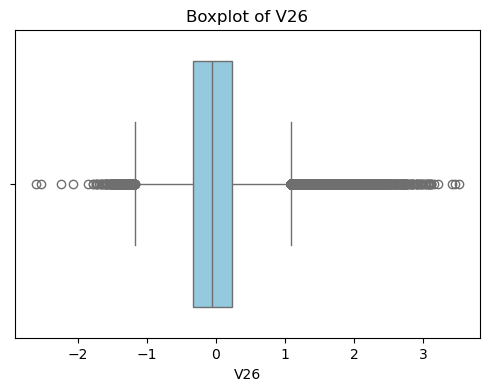

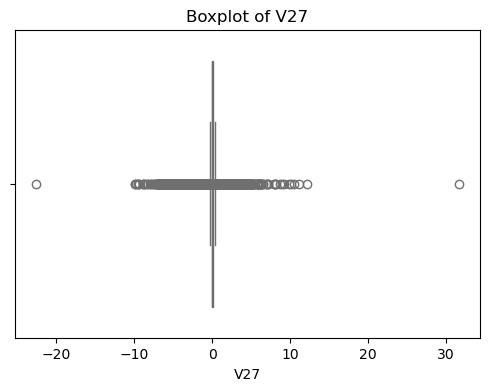

In [28]:
features = ['Amount', 'V11', 'V2', 'V17', 'V4', 'V9', 'V13', 'V15', 'V18', 'V19', 'V22', 'V24', 'V25', 'V26', 'V27']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

## Chack Corr-Relaction

<Axes: >

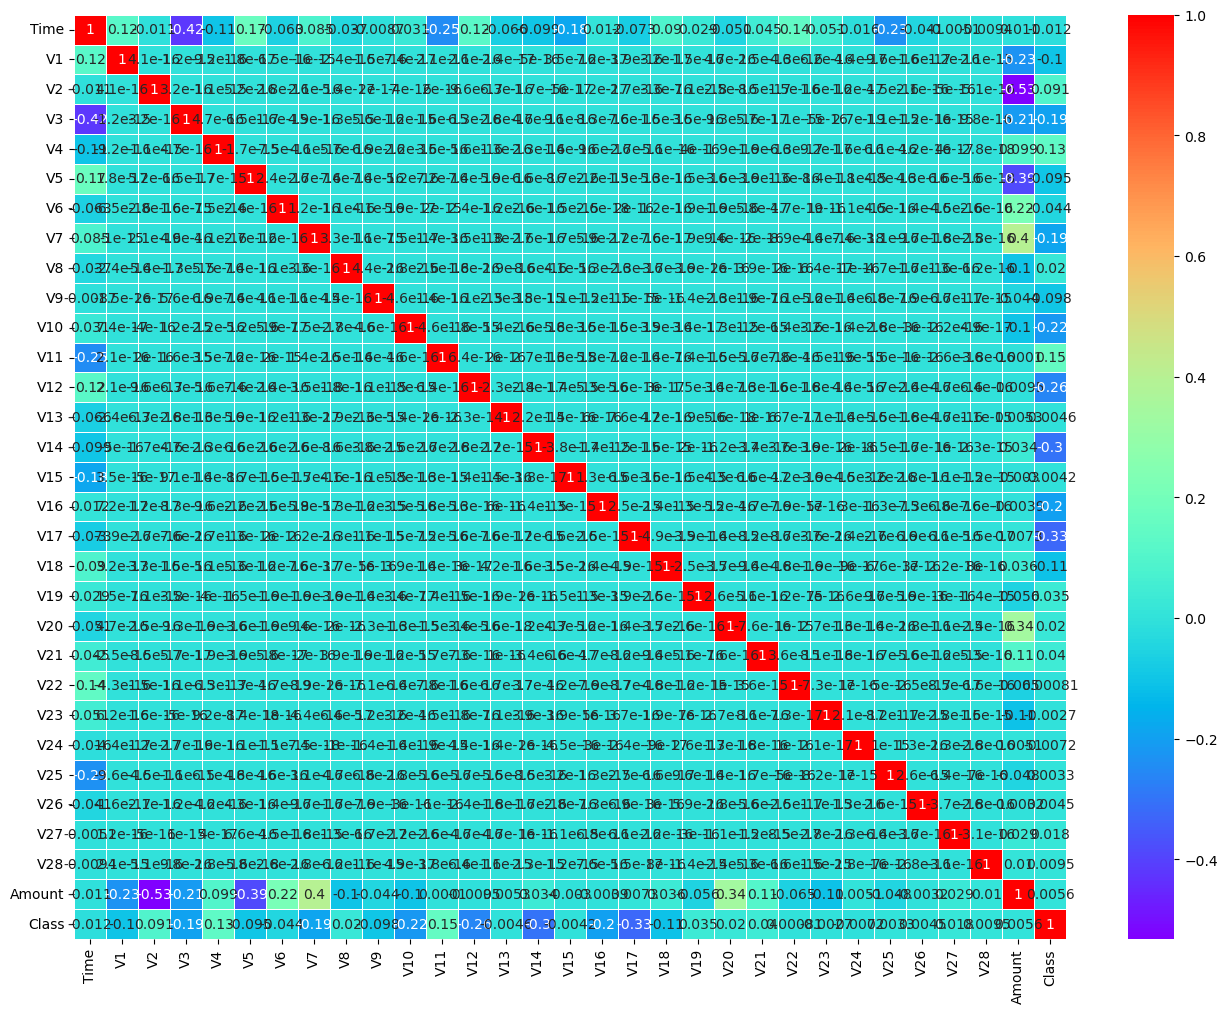

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,cmap='rainbow',linewidth=0.5)

## Model Creation 

In [29]:
data1 = data.copy()

### Scale the data

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount']] = scaler.fit_transform(data1[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                                                       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                                       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']])

### Create X and y

In [31]:
X = data1.drop('Class',axis=1)
y = data1.Class

In [32]:
X.shape

(283726, 30)

In [33]:
y.shape

(283726,)

### Split the data

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=14)

In [35]:
X_train.shape

(226980, 30)

In [36]:
y_test.shape

(56746,)

### SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train,y_train)
print('Actual Value:',Counter(y_train))
print('SMOTE Value:',Counter(y_smote))

Actual Value: Counter({0: 226602, 1: 378})
SMOTE Value: Counter({0: 226602, 1: 226602})


### Check Metrics

In [39]:
from sklearn.metrics import accuracy_score,classification_report,recall_score,f1_score

## Model 1 :- Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_smote,y_smote)
lr_pred = lr.predict(X_test)
accuracy_score(lr_pred,y_test)


0.9717336904803863

In [41]:
recall_score(y_test,lr_pred)

0.9263157894736842

In [42]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.93      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.54     56746
weighted avg       1.00      0.97      0.98     56746



In [43]:
pd.crosstab(y_test,lr_pred)

col_0,0,1
Class,,
0,55054,1597
1,7,88


In [44]:
## check cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr,X,y, cv=3, scoring='accuracy')
print(score)
print('Cross Val Score:',score.mean())
print('Std:',score.std())

[0.99929158 0.99896379 0.99892149]
Cross Val Score: 0.9990589504217992
Std: 0.00016539419936986583


## Model 2 :- Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_smote,y_smote)
dt_pred = dt.predict(X_test)
accuracy_score(y_test,dt_pred)

0.9974447538152469

In [52]:
recall_score(y_test,dt_pred)

0.7789473684210526

In [46]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.37      0.78      0.51        95

    accuracy                           1.00     56746
   macro avg       0.69      0.89      0.75     56746
weighted avg       1.00      1.00      1.00     56746



## Model 3 :- XGBoost

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,21,25.6,27,30,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100],
              'alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

xgb=XGBClassifier(random_state=42,verbosity=0,silent=0)
xgb_cv= RandomizedSearchCV(estimator=xgb, scoring='accuracy', param_distributions = param_grid, n_iter=100, cv=3, 
                               verbose=1, n_jobs=-1)
                                                    
xgb_cv.fit(X_train, y_train)
cv_best_params = xgb_cv.best_params_ 
print(f"Best paramters: {cv_best_params})")

In [49]:
xgb = XGBClassifier(n_estimators=150,
                      max_depth=6,
                      learning_rate=0.01, 
                      reg_lambda=0.1, 
                      gamma=0.4,
                      alpha=0)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
accuracy_score(xgb_pred,y_test)


0.9995418179254926

In [50]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.79      0.85        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [51]:
recall_score(y_test,xgb_pred)

0.7894736842105263

## Model 4 :- Random Forest with Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion':['gini','entropy'],
    'n_estimators':[50,100,150,200,250,300,350],
    'max_depth':(list(range(1,20))),
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':(list(range(1,20))),
    
}


rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(estimator = rf, param_distributions=params, cv=3, verbose=3, scoring='accuracy')

rf_cv.fit(X_train,y_train)
best_params = rf_cv.best_params_
print(f'Best Parameters:{best_params}')


In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,
                             min_samples_split=4,
                             min_samples_leaf=8,
                             max_depth=4,
                             criterion='entropy')
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
accuracy_score(rf_pred,y_test)

0.9992069925633524

In [55]:
recall_score(rf_pred,y_test)

0.7840909090909091

In [56]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.78      0.73      0.75        95

    accuracy                           1.00     56746
   macro avg       0.89      0.86      0.88     56746
weighted avg       1.00      1.00      1.00     56746



## Model 5 :- Bagging Classifier

In [57]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier()
bagg.fit(X_train,y_train)
bagg_pred = bagg.predict(X_test)
accuracy_score(y_test,bagg_pred)


0.9994889507630493

In [58]:
recall_score(bagg_pred,y_test)

0.8928571428571429

In [59]:
print(classification_report(y_test,bagg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.79      0.84        95

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



## Model 6 :- Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_smote,y_smote)
gb_pred = gb.predict(X_test)
accuracy_score(y_test,gb_pred)

0.9860254467275227

In [61]:
recall_score(gb_pred,y_test)

0.09977064220183486

In [62]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.10      0.92      0.18        95

    accuracy                           0.99     56746
   macro avg       0.55      0.95      0.59     56746
weighted avg       1.00      0.99      0.99     56746



## Challenges of Imbalanced Data
Model Bias:

Most models optimize for overall accuracy, which means they may ignore the minority class entirely. Example: A model predicting "Non-Fraud" for all transactions would achieve 99.8% accuracy but fail to identify fraud.

Metrics Misrepresentation:

Accuracy alone is not a reliable metric for imbalanced datasets. Precision, recall, F1-score, and confusion matrix become more important.

Why Use stratify=y?

stratify=y ensures that the class distribution in the y target variable is maintained in both training and test sets.

Stratified Splitting:

Preserves the proportion of each class during the split.

Ensures the training and test sets are representative of the overall dataset.

Importance for Imbalanced Datasets:

Prevents underrepresented classes from being excluded in one of the subsets.

Leads to fair evaluation by maintaining consistent class proportions.ss.